In [1]:
# put absolute path here
DATA_DIR = r"C:\Users\Joanna\NLP_homeworks\json"

In [2]:
# making usage of my helper .py file in jupyter environment on any computer
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from file_utils import *
data_manager = DataManager(DATA_DIR)

In [3]:
# Actual homework starts here
import re
generator = data_manager.judgments_generator(year=2009)

In [4]:
def make_value_from_match(number_group, magnitude_group):
    number_group = re.sub(re.compile(r'\s+'), '', number_group)
    magnitudes = {'tys': 1000, 'mln':10e6, 'mld':10e9, '': 1}
    return int(number_group.replace('.', '')) * magnitudes[magnitude_group.replace('.', '')]

In [5]:
#MONEY REGEX
value = r'(?:\d+(?P<sep>\.|(?:\s)))?(?:\d+(?P=sep))*\d+'

magnitude = r'(?:mld|mln|tys)?(?:\.)?'
currency = r'(?:starych)?\s*(?:złotych|zł)'

money_regex = r'((%s)\s*(%s)\s*(%s))' % (value, magnitude, currency)

In [6]:
plot_data_to_mln = []
plot_data_from_mln = []

counter = 0
while True:
    try:
        content = generator.__next__()
        words = re.findall(money_regex, content["textContent"])
        for word in words:
#                 print(content["id"])
#                 print(word)
            value = make_value_from_match(word[1], word[3])
#                 print(value)
            plot_data_to_mln.append(value) if value <= 1000000 else plot_data_from_mln.append(value)
        counter += len(words)
    except StopIteration:
        break
print("Total number of gathered amounts: %d" % counter)   

Total number of gathered amounts: 18275


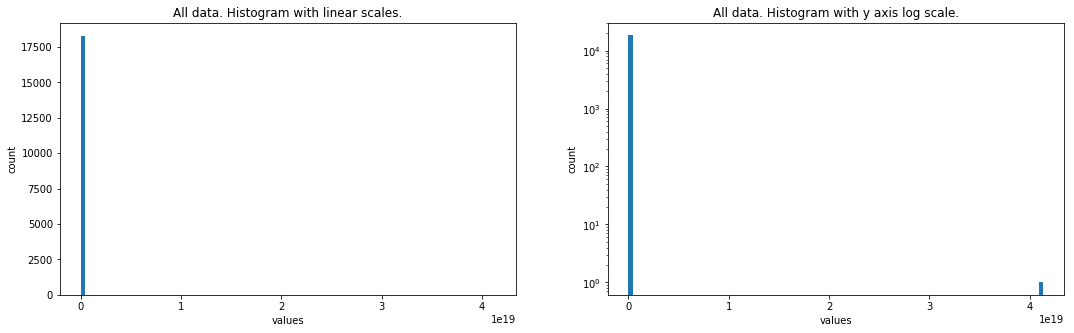

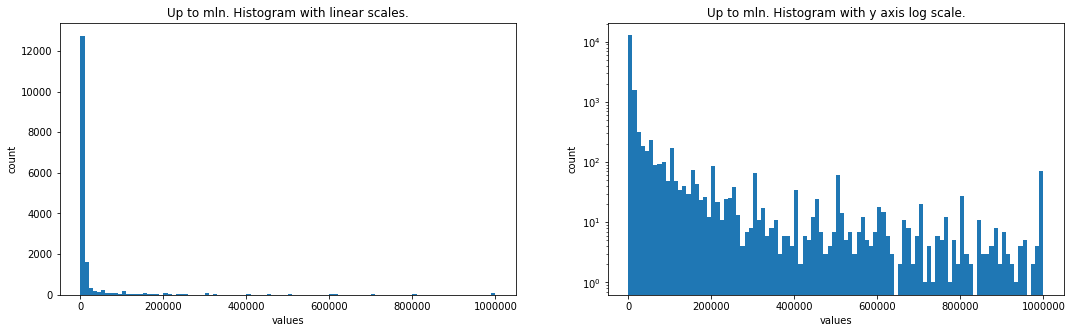

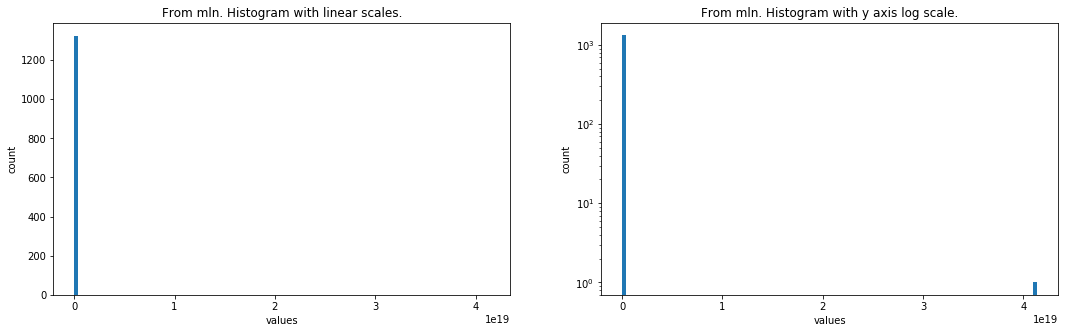

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(18,5))
plt.subplot(121)
plt.hist(plot_data_to_mln + plot_data_from_mln, bins=100)
plt.xlabel('values')
plt.ylabel('count')
plt.title('All data. Histogram with linear scales.')
plt.subplot(122)
plt.hist(plot_data_to_mln + plot_data_from_mln, bins=100, log=True)
plt.xlabel('values')
plt.ylabel('count')
plt.title('All data. Histogram with y axis log scale.')

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.hist(plot_data_to_mln, bins=100)
plt.xlabel('values')
plt.ylabel('count')
plt.title('Up to mln. Histogram with linear scales.')
plt.subplot(122)
plt.hist(plot_data_to_mln, bins=100, log=True)
plt.xlabel('values')
plt.ylabel('count')
plt.title('Up to mln. Histogram with y axis log scale.')

plt.figure(figsize=(18,5))
plt.subplot(121)
plt.hist(plot_data_from_mln, bins=100)
plt.xlabel('values')
plt.ylabel('count')
plt.title('From mln. Histogram with linear scales.')
plt.subplot(122)
plt.hist(plot_data_from_mln, bins=100, log=True)
plt.xlabel('values')
plt.ylabel('count')
plt.title('From mln. Histogram with y axis log scale.')
print("") # prevent printing bins content  